In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("dfhappy.csv")

In [3]:
df

,,Overall rank,country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,tavg
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.352894
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,10.321334
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,8.104241
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5.449112
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,11.179195
...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,17.850000
152,152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,22.350000
153,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,12.600000
154,154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,28.327278


In [4]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,tavg
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,19.399574
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,7.334859
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,12.860886
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,20.925301
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,25.794983
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,31.381719


<AxesSubplot:xlabel='GDP per capita', ylabel='Score'>

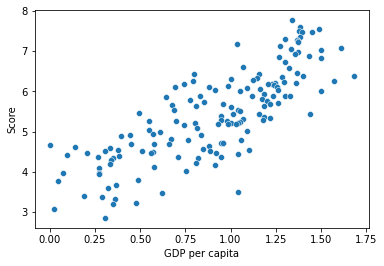

In [5]:
sns.scatterplot(x="GDP per capita", y="Score", data=df)

<AxesSubplot:xlabel='tavg', ylabel='Score'>

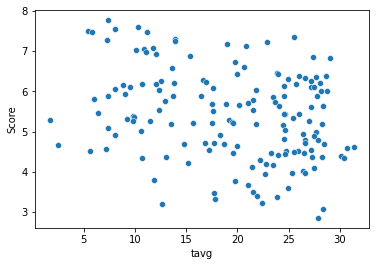

In [6]:
sns.scatterplot(x="tavg", y="Score", data=df)

<AxesSubplot:xlabel='Social support', ylabel='tavg'>

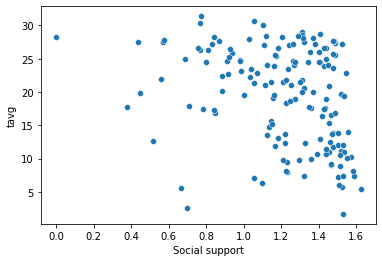

In [7]:
sns.scatterplot(x="Social support", y="tavg", data=df)

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='tavg'>

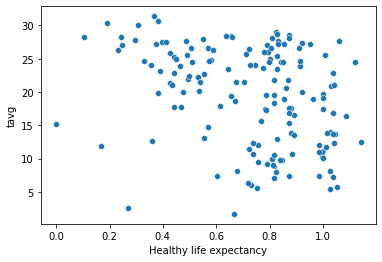

In [8]:
sns.scatterplot(x="Healthy life expectancy", y="tavg", data=df)

<AxesSubplot:xlabel='GDP per capita', ylabel='Perceptions of corruption'>

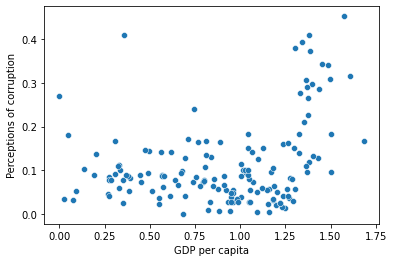

In [9]:
sns.scatterplot(x="GDP per capita", y="Perceptions of corruption", data=df)

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Perceptions of corruption'>

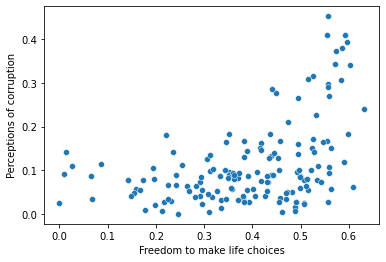

In [10]:
sns.scatterplot(x="Freedom to make life choices", y="Perceptions of corruption", data=df)

<AxesSubplot:xlabel='country', ylabel='GDP per capita'>

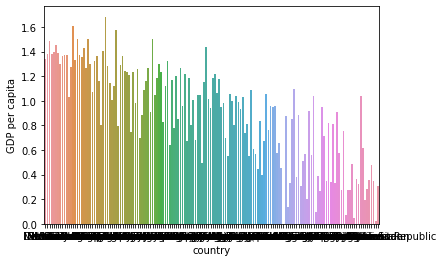

In [11]:
sns.barplot(x='country', y='GDP per capita', data=df)

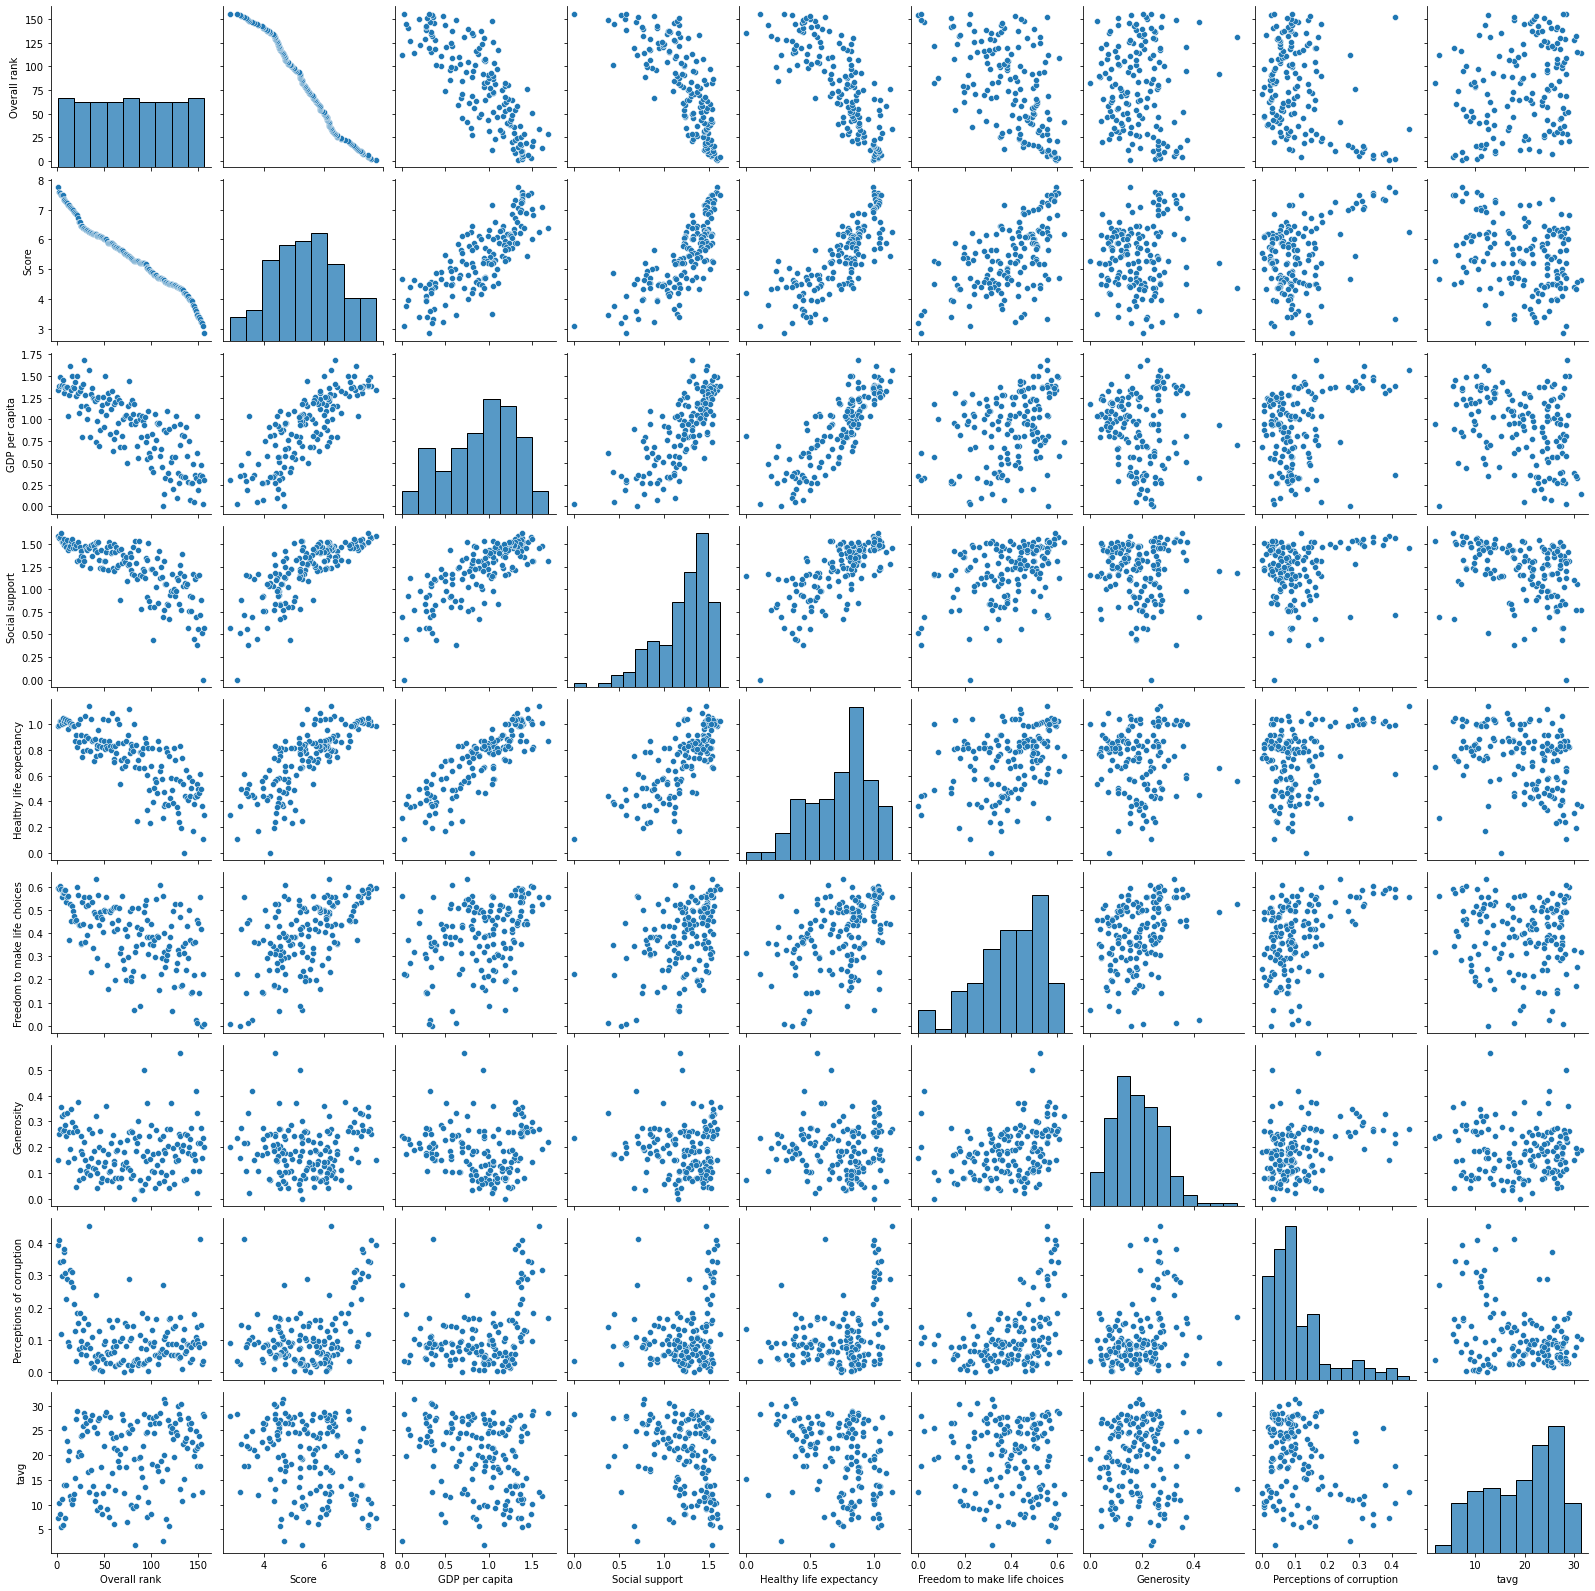

In [12]:
sns.pairplot(data=df)

In [13]:
corr= df.corr()

<AxesSubplot:>

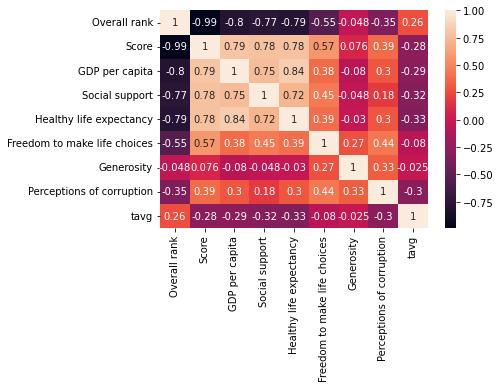

In [14]:
sns.heatmap(corr, annot=True)

In [44]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [45]:
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']]

In [46]:
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

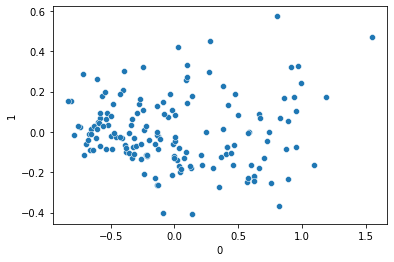

In [47]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

In [48]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0, 0.5, 'Var')

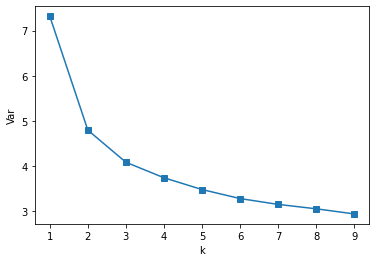

In [49]:
plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('k')
plt.ylabel('Var')

In [50]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [51]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

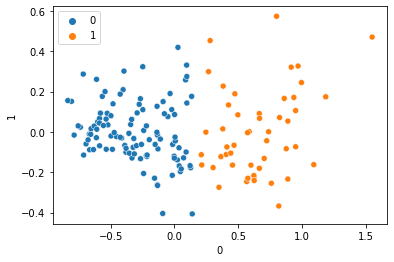

In [52]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

In [53]:
X.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


<AxesSubplot:xlabel='GDP per capita', ylabel='Perceptions of corruption'>

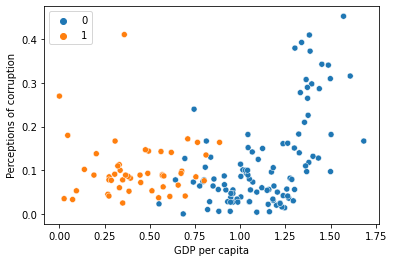

In [54]:
sns.scatterplot(x = X['GDP per capita'], y = X['Perceptions of corruption'],
                hue=y)

<AxesSubplot:xlabel='GDP per capita', ylabel='Social support'>

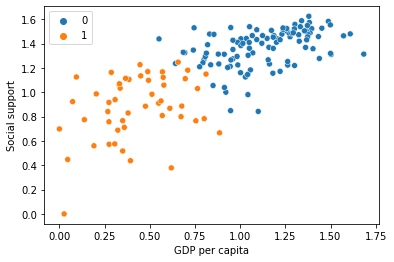

In [55]:
sns.scatterplot(x = X['GDP per capita'], y = X['Social support'],
                hue=y)

<AxesSubplot:xlabel='GDP per capita', ylabel='Generosity'>

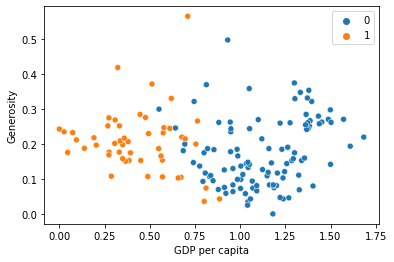

In [56]:
sns.scatterplot(x = X['GDP per capita'], y = X['Generosity'],
                hue=y)

In [57]:
clusters = y
X['clusters'] = clusters

C:\Users\Red Wraith\AppData\Local\Temp\ipykernel_4912\3112129224.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
X

,,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,clusters
0,0,1.340,1.587,0.986,0.596,0.153,0.393,0
1,1,1.383,1.573,0.996,0.592,0.252,0.410,0
2,2,1.488,1.582,1.028,0.603,0.271,0.341,0
3,3,1.380,1.624,1.026,0.591,0.354,0.118,0
4,4,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...
151,151,0.359,0.711,0.614,0.555,0.217,0.411,1
152,152,0.476,0.885,0.499,0.417,0.276,0.147,1
153,153,0.350,0.517,0.361,0.000,0.158,0.025,1
154,154,0.026,0.000,0.105,0.225,0.235,0.035,1


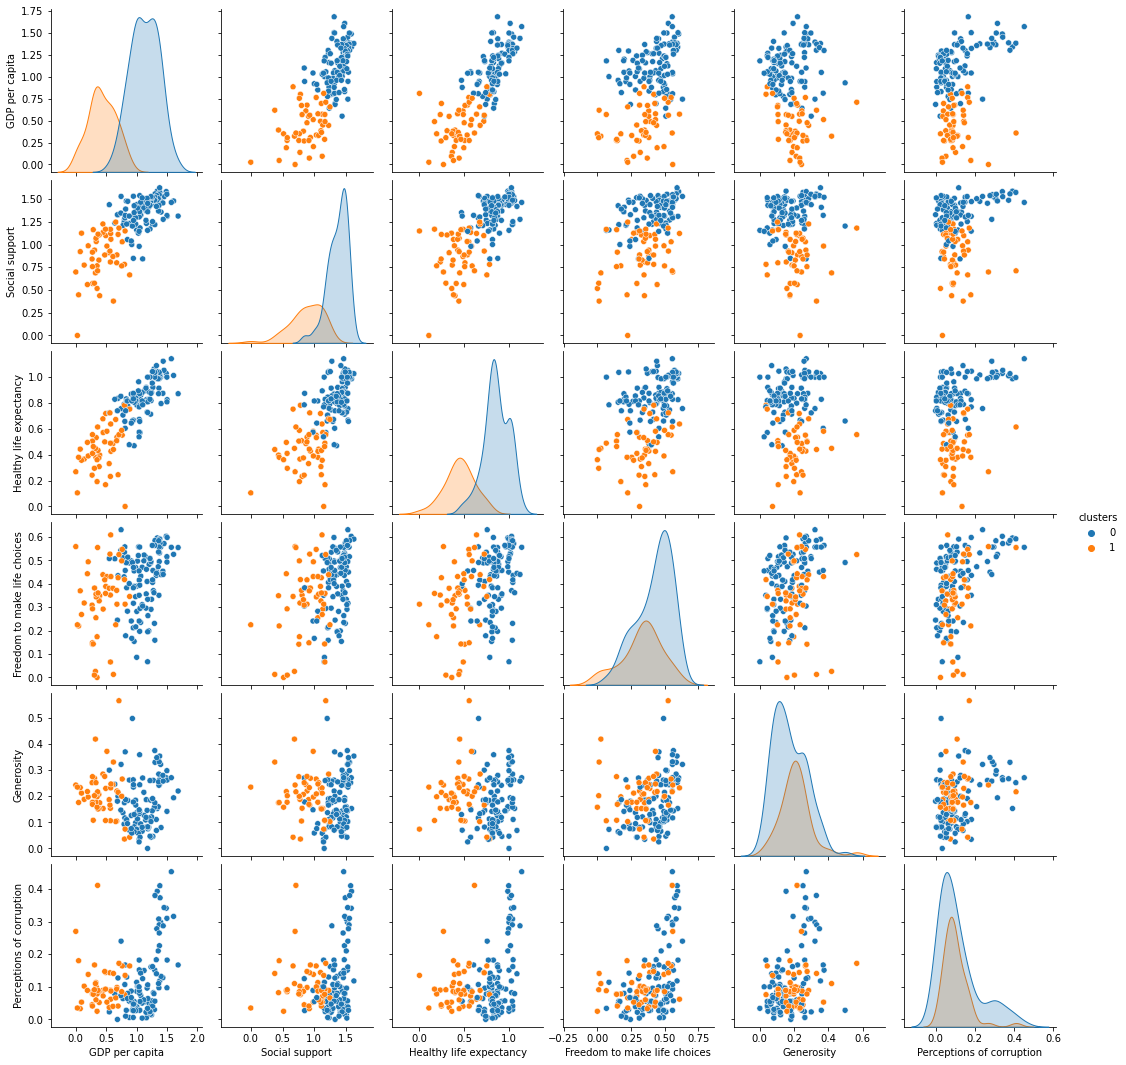

In [59]:
sns.pairplot(data=X, hue='clusters')

In [61]:
df['cluster'] = clusters

In [63]:
fig = px.scatter(df, x = 'GDP per capita', y = 'Social support', color='cluster', 
                 hover_data=['GDP per capita', 'Social support', 'Healthy life expectancy',
                             'Freedom to make life choices', 'Generosity',
                             'Perceptions of corruption', 'Score',
                             'Overall rank', 'country', 'tavg'])
fig.show()

In [31]:
X = X.drop('clusters', axis='columns')

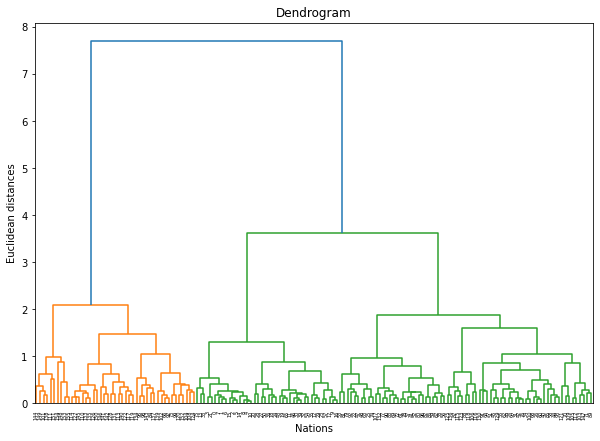

In [33]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Nations')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [34]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [35]:
clust_agglo = agglo.fit_predict(X)

In [36]:
df['agglo_cluster'] = agglo.fit_predict(X)

In [37]:
import plotly.express as px

In [43]:
fig = px.scatter(df, x = 'GDP per capita', y = 'Social support', color='agglo_cluster', 
                 hover_data=['GDP per capita', 'Social support', 'Healthy life expectancy',
                             'Freedom to make life choices', 'Generosity',
                             'Perceptions of corruption', 'Score',
                             'Overall rank', 'country', 'tavg'])
fig.show()